In [2]:
from scipy.stats import poisson, chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from scipy.stats import kstest
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
data = pd.read_csv('chess_games.csv')
df = pd.read_csv('chess_games.csv')
# display(data)

#Задание 1

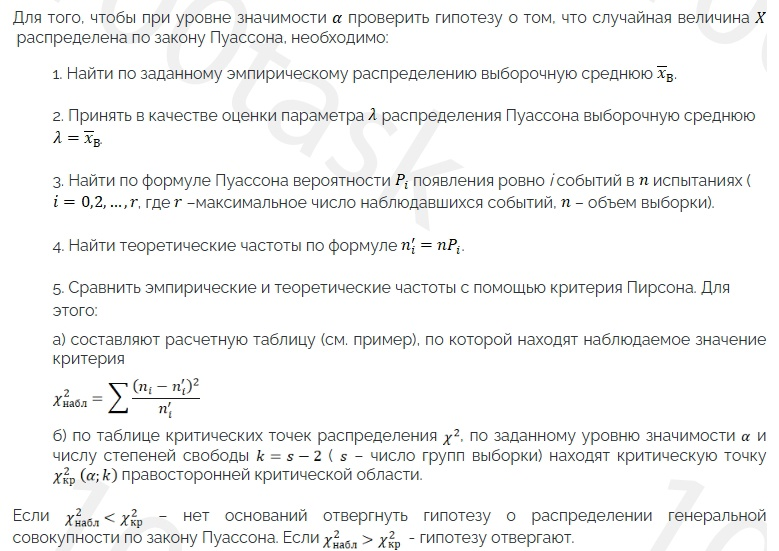

H0: Распределение количества ходов соответствует Пуассоновскому закону.

H1: Распределение количества ходов не соответствует Пуассоновскому закону.

In [ ]:

# Рассчитаем выборочную среднюю
sample_mean = df['turns'].mean()
lambda_est = sample_mean

# Найдем максимальное количество ходов
max_events = df['turns'].max()

expected_frequencies = []

#  Ожидаемые частоты согласно распределению Пуассона
for i in range(max_events + 1):
    prob = poisson.pmf(i, lambda_est)
    expected_frequencies.append(prob * len(df))

# Частоты для каждого значения
observed_frequencies, _ = np.histogram(df['turns'], bins=np.arange(max_events + 2))

# Рассчитаем статистику хи-квадрат
chi_square_stat = np.sum(((observed_frequencies - expected_frequencies) ** 2) / expected_frequencies)

# Рассчитаем степени свободы
df_chi2 = len(observed_frequencies) - 1


p_value = 1 - chi2.cdf(chi_square_stat, df=df_chi2)

print("Chi-square statistic:", chi_square_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: количество ходов не распределено по закону Пуассона.")
else:
    print("Не отвергаем нулевую гипотезу: количество ходов распределено по закону Пуассона.")


Chi-square statistic: 2.2924976949021573e+138
p-value: 0.0
Отвергаем нулевую гипотезу: количество ходов не распределено по закону Пуассона.


In [ ]:


lambda_est = data['turns'].mean()

# Разобьем результаты на интервалы
n_intervals = 10
bins = np.linspace(df['turns'].min(), df['turns'].max(), n_intervals)

# Получим наблюдаемые частоты для каждого интервала
observed_frequencies, _ = np.histogram(df['turns'], bins=bins)

# Ожидаемые частоты согласно распределению Пуассона
expected_frequencies = [len(df) * poisson.pmf(i, lambda_est) for i in range(len(bins) - 1)]


df_chi2 = len(observed_frequencies) - 1

# Рассчитаем статистику хи-квадрат
chi_square_stat = np.sum(((observed_frequencies - expected_frequencies) ** 2) / expected_frequencies)


p_value = 1 - chi2.cdf(chi_square_stat, df=df_chi2)

print("Chi-square statistic:", chi_square_stat)
print("p-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: количество ходов не распределено по закону Пуассона.")
else:
    print("Не отвергаем нулевую гипотезу: количество ходов распределено по закону Пуассона.")


Chi-square statistic: 3.049610813886789e+29
p-value: 0.0
Отвергаем нулевую гипотезу: количество ходов не распределено по закону Пуассона.


In [ ]:
from scipy.stats import kstest, poisson

# Применим критерий Колмогорова-Смирнова
lambda_est = data['turns'].mean()
ks_stat, p_value_ks = kstest(data['turns'], poisson.cdf, args=(lambda_est,))

print("Критерий Колмогорова-Смирнова statistic:", ks_stat)
print("p-value (Критерий Колмогорова-Смирнова):", p_value_ks)


alpha = 0.05
if p_value_ks < alpha:
    print("Отвергаем нулевую гипотезу: количество ходов не распределено по закону Пуассона.")
else:
    print("Не отвергаем нулевую гипотезу: количество ходов распределено по закону Пуассона.")


Критерий Колмогорова-Смирнова statistic: 0.34780165875936864
p-value (Критерий Колмогорова-Смирнова): 0.0
Отвергаем нулевую гипотезу: количество ходов не распределено по закону Пуассона.


#Задание 2

Основная гипотеза (H0): Количество ходов в рейтинговых и нерейтинговых играх однородно.

Альтернативная гипотеза (H1): Количество ходов в рейтинговых и нерейтинговых играх не однородно.

In [ ]:

from scipy.stats import chi2

# Создадим таблицу сопряженности для количества ходов и типа игры
cross_tab  = pd.crosstab(data['rated'], data['turns'])


# Преобразуем сведенную таблицу в массив
observed = cross_tab.values

# Рассчитаем количество строк и столбцов в таблице
m, n = cross_tab.shape

chi2_statistic = 0


for i in range(m):
    for j in range(n):
        # Получим наблюдаемую и ожидаемую частоты
        observed_ij = observed[i, j]
        expected_ij = cross_tab.iloc[i, :].sum() * cross_tab.iloc[:, j].sum() / cross_tab.sum().sum()

        #общая статистика хи-квадрат
        chi2_statistic += (observed_ij - expected_ij)**2 / expected_ij


chi2_statistic *= m * n

# Рассчитаем количество степеней свободы
degrees_of_freedom = (m - 1) * (n - 1)

# Определение p-значения
p_value = 1 - chi2.cdf(chi2_statistic, degrees_of_freedom)
alpha = 0.05

print("Хи-квадрат статистика:", chi2_statistic)
print("p-значение:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: результаты неоднородны.")
else:
    print("Не отвергаем нулевую гипотезу: результаты однородны.")


Хи-квадрат статистика: 178869.08638540853
p-значение: 0.0
Отвергаем нулевую гипотезу: результаты неоднородны.


In [ ]:
# Разделим выборку на две: количество ходов в рейтинговых и нерейтинговых играх
rated_moves = data[data['rated'] == True]['turns']
not_rated_moves = data[data['rated'] == False]['turns']
# Применим критерий Колмогорова-Смирнова
ks_stat, p_value_ks = ks_2samp(rated_moves, not_rated_moves)

print("KS statistic:", ks_stat)
print("p-value (KS test):", p_value_ks)


alpha = 0.05
if p_value_ks < alpha:
    print("Отвергаем нулевую гипотезу: результаты неоднородны.")
else:
    print("Не отвергаем нулевую гипотезу: результаты однородны.")

KS statistic: 0.10439670838635423
p-value (KS test): 2.739935850453732e-30
Отвергаем нулевую гипотезу: результаты неоднородны.


#Задание 3

Основная гипотеза (H0): Рейтинг игрока, играющего белыми фигурами, и результат игры (победа/поражение) независимы.
Альтернативная гипотеза (H1): Рейтинг игрока, играющего белыми фигурами, и результат игры (победа/поражение) зависимы.

In [ ]:

df = data

cross_tab = pd.crosstab(df['winner'], df['white_rating'])

observed = cross_tab.values
# Рассчитаем количество элементов в таблице сопряженности
n = observed.sum()

chi2_observed = 0
v = list(observed)

for i in range(len(v)):
  for j in range(len(v[i])):
    chi2_observed += v[i][j]**2 / (sum(v[i]) * sum(k[j] for k in v))

chi2_observed = n * (chi2_observed - 1)


degrees_of_freedom = (cross_tab.shape[0] - 1) * (cross_tab.shape[1] - 1)

# Определение p-значения
p_value = 1 - chi2.cdf(chi2_observed, degrees_of_freedom)
alpha = 0.05


print("Хи-квадрат статистика:", chi2_observed)
print("Хи-квадрат крит:", chi2.ppf(1-alpha, degrees_of_freedom))
print("p-value:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: результаты зависимы.")
else:
    print("Не отвергаем нулевую гипотезу: результаты независимы.")

Хи-квадрат статистика: 4310.924147180447
Хи-квадрат крит: 3159.172185058977
p-value: 0.0
Отвергаем нулевую гипотезу: результаты зависимы.


In [ ]:
from scipy.stats import ks_2samp

df = data
# Разделим выборку на две: рейтингов белых для победителей и непобедителей
white_ratings_winner = data[data['winner'] == 'white']['white_rating']
white_ratings_loser = data[data['winner'] != 'white']['white_rating']


# Проверяем наличие различий между двумя выборками с помощью критерия Колмогорова-Смирнова
ks_statistic, p_value = ks_2samp(white_ratings_winner, white_ratings_loser)


alpha = 0.05


print("Статистика Колмогорова-Смирнова:", ks_statistic)
print("p-значение:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: результаты зависимы.")
else:
    print("Не отвергаем нулевую гипотезу: результаты независимы.")


Статистика Колмогорова-Смирнова: 0.09860831179160867
p-значение: 6.83914425975718e-43
Отвергаем нулевую гипотезу: результаты зависимы.


#Дополнение к заданиям

In [ ]:
#ЗАДАНИЕ 2 хи квадрат
from scipy.stats import chi2_contingency
# Создадим таблицу сопряженности для количества ходов и типа игры
cross_tab = pd.crosstab(data['rated'], data['turns'])

# Выполним критерий хи-квадрат для независимости переменных
chi2_statistic, p_value, _, _ = chi2_contingency(cross_tab)

# Выведем результаты
print("Хи-квадрат статистика:", chi2_statistic)
print("p-значение:", p_value)

# Уровень значимости
alpha = 0.05

# Принятие решения
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: количество ходов в рейтинговых и нерейтинговых играх неоднородно.")
else:
    print("Не отвергаем нулевую гипотезу: количество ходов в рейтинговых и нерейтинговых играх однородно.")


Хи-квадрат статистика: 423.86039427821896
p-значение: 1.4469884988058233e-16
Отвергаем нулевую гипотезу: количество ходов в рейтинговых и нерейтинговых играх неоднородно.


In [ ]:




# Функция для вычисления среднего количества ходов
def calculate_mean_turns(data):
    return data["turns"].mean()

# Функция для разбиения данных на интервалы и подсчета наблюдаемых частот
def calculate_observed_frequencies(data, interval_width):
    min_turns = data["turns"].min()
    max_turns = data["turns"].max()
    intervals = np.arange(min_turns, max_turns + interval_width, interval_width)
    observed_frequencies = np.histogram(data["turns"], bins=intervals)[0]
    return intervals, observed_frequencies

# Функция для вычисления ожидаемых частот для распределения Пуассона
def calculate_expected_frequencies(mean_turns, intervals):
    expected_frequencies = []
    for i in range(len(intervals) - 1):
        interval_mean = (intervals[i] + intervals[i + 1]) / 2
        expected_frequency = poisson.pmf(interval_mean, mean_turns) * len(data)
        expected_frequencies.append(expected_frequency)
    return expected_frequencies

# Функция для вычисления статистики Хи-квадрат
def pearson_chi_square(observed_frequencies, expected_frequencies):
    squared_diff = [(observed - expected) ** 2 / expected for observed, expected in zip(observed_frequencies, expected_frequencies)]
    chi_square = sum(squared_diff)
    return chi_square

# Вычисление среднего количества ходов
mean_turns = calculate_mean_turns(data)

# Использование интервалов шириной 10 ходов
interval_width = 10
intervals, observed_frequencies = calculate_observed_frequencies(data, interval_width)

# Вычисление ожидаемых частот
expected_frequencies = calculate_expected_frequencies(mean_turns, intervals)

# Вычисление статистики Хи-квадрат
chi_square = pearson_chi_square(observed_frequencies, expected_frequencies)

# Число степеней свободы
degrees_of_freedom = len(observed_frequencies) - 1

# Критическое значение для уровня значимости 0.05 и числа степеней свободы
critical_value = chi2.ppf(1 - 0.05, degrees_of_freedom)

# Вывод результатов
print("Среднее количество ходов:", mean_turns)
print("Интервалы:", intervals)
print("Наблюдаемые частоты:", observed_frequencies)
print("Ожидаемые частоты:", expected_frequencies)
print("Статистика Хи-квадрат:", chi_square)
print("Число степеней свободы:", degrees_of_freedom)
print("Критическое значение Хи-квадрат для уровня значимости 0.05 и", degrees_of_freedom, "степеней свободы:", critical_value)

# Сравнение статистики Хи-квадрат с критическим значением
if chi_square > critical_value:
    print("Статистика Хи-квадрат больше критического значения.")
    print("Отклоняем нулевую гипотезу. Распределение количества ходов не соответствует распределению Пуассона.")
else:
    print("Статистика Хи-квадрат меньше критического значения.")
    print("Не можем отклонить нулевую гипотезу. Распределение количества ходов соответствует распределению Пуассона.")


Среднее количество ходов: 60.46465250772759
Интервалы: [  1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191 201 211 221 231 241 251 261 271 281 291 301 311 321 331 341 351]
Наблюдаемые частоты: [ 681 1114 1771 2377 2708 2754 2227 1684 1250  957  754  643  392  269
  188  125   73   40   19    9   12    3    4    0    0    2    0    0
    0    0    0    0    0    0    2]
Ожидаемые частоты: [7.490306067311303e-15, 1.6835579887061428e-07, 0.005704850396101169, 4.039650109942526, 178.37123538601938, 901.6570608862585, 769.2217396688618, 145.0494331779822, 7.373193241480206, 0.11765270819101241, 0.0006648095708990828, 1.4669186635088463e-06, 1.3704809875283947e-09, 5.80319991487533e-13, 1.1803581712896786e-16, 1.2125059067790165e-20, 6.571450705422837e-25, 1.9527419830994824e-29, 3.2918354938280336e-34, 3.245297821469398e-39, 1.922918905190468e-44, 7.018970497984026e-50, 1.6140497623843648e-55, 2.3864750722115202e-61, 2.3115770273442664e-67, 1.4922010705127858e-

In [ ]:


# Определение параметров для распределения Пуассона
lambda_poisson = data['turns'].mean()

# Применение критерия Колмогорова-Смирнова
statistic_ks, p_value_ks = kstest(data['turns'], 'poisson', args=(lambda_poisson,))

# Вывод результатов
print("Статистика Колмогорова-Смирнова:", statistic_ks)
print("p-значение:", p_value_ks)

# Интерпретация результатов
alpha = 0.05
if p_value_ks < alpha:
    print("Отклоняем нулевую гипотезу о согласованности с распределением Пуассона.")
else:
    print("Нет оснований отклонять нулевую гипотезу о согласованности с распределением Пуассона.")


Статистика Колмогорова-Смирнова: 0.34778626119805034
p-значение: 0.0
Отклоняем нулевую гипотезу о согласованности с распределением Пуассона.
